In [1]:
# cargamos todas las librerías
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.stats import anderson
from scipy.stats import fligner
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
# cargamos los datasets
DATA_FOLDER = 'titanic/'

train = pd.read_csv(os.path.join(DATA_FOLDER, 'train.csv'))
test = pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv'))

In [3]:
# mostramos la información básica del dataset train
print('train.head()')
print(train.head())

print('\ntrain.info(verbose=True)')
print(train.info(verbose=True))

print('\ntrain.describe()')
print(train.describe(include = 'all'))

train.head()
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN 

In [4]:
# descartamos las columnas que no son relevantes para nuestro modelo
train.drop(columns=['PassengerId', 'Ticket', 'Name'], inplace = True)

In [5]:
# mostramos la cantidad de valores nulos que tienen los atributos
print('\ntrain.isna(): ')
print(train.isna().sum())


train.isna(): 
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [6]:
# completamos la edad con la media
train['Age'].fillna(train['Age'].mean(), inplace = True)

# completamos embarcado con la moda
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)

# completamos la tarifa con la media
train['Fare'].fillna(train['Fare'].mean(), inplace = True)

# eliminamos la columna cabina
#train.drop(columns=['Cabin'], inplace = True)

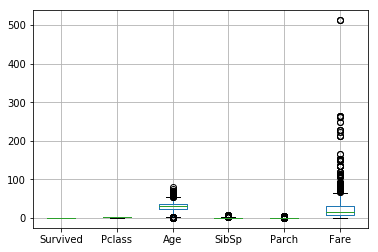

In [7]:
# mostramos los boxplot para ver outliers
train.boxplot()

Text(0.5,1,'Fare Boxplot')

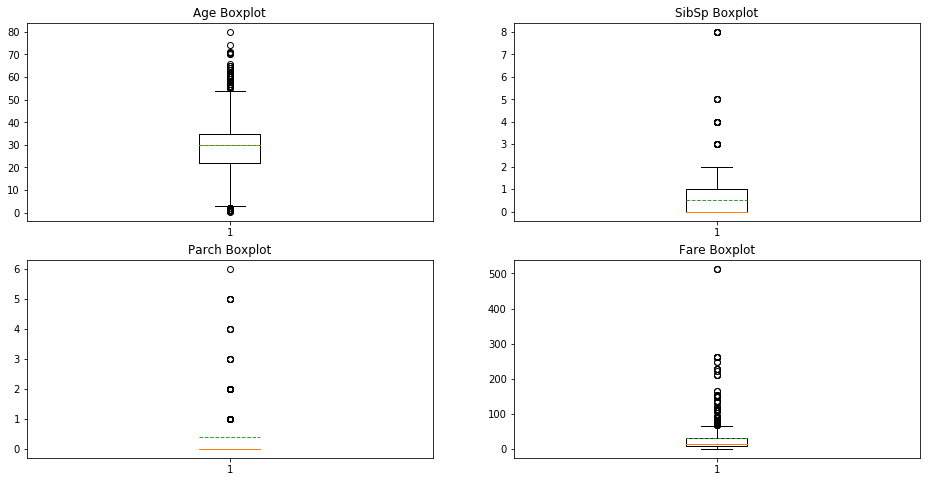

In [8]:
# boxplot individuales para las variables numéricas
plt.figure(figsize=[16,8])
plt.subplot(221)
plt.boxplot(x=train['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')

plt.subplot(222)
plt.boxplot(x=train['SibSp'], showmeans = True, meanline = True)
plt.title('SibSp Boxplot')

plt.subplot(223)
plt.boxplot(x=train['Parch'], showmeans = True, meanline = True)
plt.title('Parch Boxplot')

plt.subplot(224)
plt.boxplot(x=train['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')

In [9]:
# comprobación de la normalidad de los datos mediante el test de Anderson
print('Age:\n------')
result = anderson(train['Age'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, los datos son normales (no podemos rechazar H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, los datos no son normales (rechazamos H0)' % (sl, cv))
      
    
print('\nSibSp:\n------')        
result = anderson(train['SibSp'])
print('Statistic: %.3f' % result.statistic)
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, los datos son normales (no podemos rechazar H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, los datos no son normales (rechazamos H0)' % (sl, cv))

        
print('\nParch:\n------')
result = anderson(train['Parch'])
print('Statistic: %.3f' % result.statistic)
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, los datos son normales (no podemos rechazar H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, los datos no son normales (rechazamos H0)' % (sl, cv))
        
        
print('\nFare:\n------')
result = anderson(train['Fare'])
print('Statistic: %.3f' % result.statistic)
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, los datos son normales (no podemos rechazar H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, los datos no son normales (rechazamos H0)' % (sl, cv))

Age:
------
Statistic: 15.318
15.000: 0.573, los datos no son normales (rechazamos H0)
10.000: 0.653, los datos no son normales (rechazamos H0)
5.000: 0.784, los datos no son normales (rechazamos H0)
2.500: 0.914, los datos no son normales (rechazamos H0)
1.000: 1.087, los datos no son normales (rechazamos H0)

SibSp:
------
Statistic: 147.365
15.000: 0.573, los datos no son normales (rechazamos H0)
10.000: 0.653, los datos no son normales (rechazamos H0)
5.000: 0.784, los datos no son normales (rechazamos H0)
2.500: 0.914, los datos no son normales (rechazamos H0)
1.000: 1.087, los datos no son normales (rechazamos H0)

Parch:
------
Statistic: 175.659
15.000: 0.573, los datos no son normales (rechazamos H0)
10.000: 0.653, los datos no son normales (rechazamos H0)
5.000: 0.784, los datos no son normales (rechazamos H0)
2.500: 0.914, los datos no son normales (rechazamos H0)
1.000: 1.087, los datos no son normales (rechazamos H0)

Fare:
------
Statistic: 122.170
15.000: 0.573, los dato

In [10]:
# comprobación de la homegeneidad de las varianzas mediante el algoritmo de Flinger
statistic, pvalue = fligner(train['Age'], train['Fare'])
print('Age vs Fare: statistic %.3f, pvalue %.3f' % (statistic, pvalue))

statistic, pvalue = fligner(train['Age'], train['SibSp'])
print('Age vs SibSp: statistic %.3f, pvalue %.3f' % (statistic, pvalue))

statistic, pvalue = fligner(train['Age'], train['Parch'])
print('Age vs Parch: statistic %.3f, pvalue %.3f' % (statistic, pvalue))

statistic, pvalue = fligner(train['Fare'], train['SibSp'])
print('Fare vs SibSp: statistic %.3f, pvalue %.3f' % (statistic, pvalue))

statistic, pvalue = fligner(train['Fare'], train['Parch'])
print('Fare vs Parch: statistic %.3f, pvalue %.3f' % (statistic, pvalue))

statistic, pvalue = fligner(train['SibSp'], train['Parch'])
print('SibSp vs Parch: statistic %.3f, pvalue %.3f' % (statistic, pvalue))

Age vs Fare: statistic 80.331, pvalue 0.000
Age vs SibSp: statistic 648.724, pvalue 0.000
Age vs Parch: statistic 698.022, pvalue 0.000
Fare vs SibSp: statistic 1017.054, pvalue 0.000
Fare vs Parch: statistic 1045.984, pvalue 0.000
SibSp vs Parch: statistic 8.778, pvalue 0.003


In [11]:
# obtenemos los datasets separados para hombres y mujeres sobrevivientes
sobrevivientes = train[train['Survived']==1]
edad_hombres_sv = sobrevivientes[sobrevivientes['Sex']=='male']['Age']
edad_mujeres_sv = sobrevivientes[sobrevivientes['Sex']=='female']['Age']
print('Edad hombres sobrevivientes: media %.3f, %.3f' % (edad_hombres_sv.mean(), edad_hombres_sv.std()))
print('Edad mujeres sobrevivientes: media %.3f, %.3f' % (edad_mujeres_sv.mean(), edad_mujeres_sv.std()))

# contraste de hipótesis sobre la diferencia de medias (Welch's t-test)
t, p = stats.ttest_ind(edad_hombres_sv, edad_mujeres_sv, equal_var = False)
print ('t-statistic: %.3f, p value: %.3f' % (t, p))

Edad hombres sobrevivientes: media 27.632, 15.258
Edad mujeres sobrevivientes: media 28.979, 13.033
t-statistic: -0.796, p value: 0.427


In [12]:
# mostramos las correlaciones sobre la variable dependiente 'Survived'
print(train.corr().abs()['Survived'].sort_values())

SibSp       0.035322
Age         0.069809
Parch       0.081629
Fare        0.257307
Pclass      0.338481
Survived    1.000000
Name: Survived, dtype: float64


In [13]:
# obtenemos el modelo de regresion lineal
X_train = train[['Age', 'SibSp', 'Parch', 'Fare']]
y_train = train['Survived'] 
modelo = LinearRegression()  
modelo.fit(X_train, y_train)  

# mostramos R2
r2 = modelo.score(X_train, y_train)
print('R^2: %.3f' % (r2))

# mostramos los coeficientes para los predictores del modelo
coeff_df = pd.DataFrame(modelo.coef_, X_train.columns, columns=['Coefficient'])  
print(coeff_df)

R^2: 0.088
       Coefficient
Age      -0.004317
SibSp    -0.056920
Parch     0.032993
Fare      0.002709


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [14]:
# codificamos las variables categóricas
codificaciones = {"Sex": {"male": 0, "female": 1},
                "Embarked": {"Q": 0, "S": 1, "C": 2}}
train_encoded = train.replace(codificaciones)

# obtenemos el modelo de regresion lineal añadiendo las variables categóricas
X_train = train_encoded[['Age', 'SibSp', 'Parch', 'Fare', 'Pclass', 'Sex', 'Embarked']]
y_train = train_encoded['Survived'] 
modelo = LinearRegression()  
modelo.fit(X_train, y_train)  

# mostramos R2
r2 = modelo.score(X_train, y_train)
print('R^2: %.3f' % (r2))

# mostramos los coeficientes para los predictores del modelo
coeff_df = pd.DataFrame(modelo.coef_, X_train.columns, columns=['Coefficient'])  
print(coeff_df)

R^2: 0.395
          Coefficient
Age         -0.005816
SibSp       -0.042867
Parch       -0.020274
Fare         0.000385
Pclass      -0.167176
Sex          0.513233
Embarked     0.018309


In [15]:
# obtenemos las predicciones del conjunto de datos
y_pred = np.round(modelo.predict(X_train)).astype(int)

# mostramos la precisión del modelo
print("Precisión: %.3f" % accuracy_score(y_train, y_pred))

Precisión: 0.798


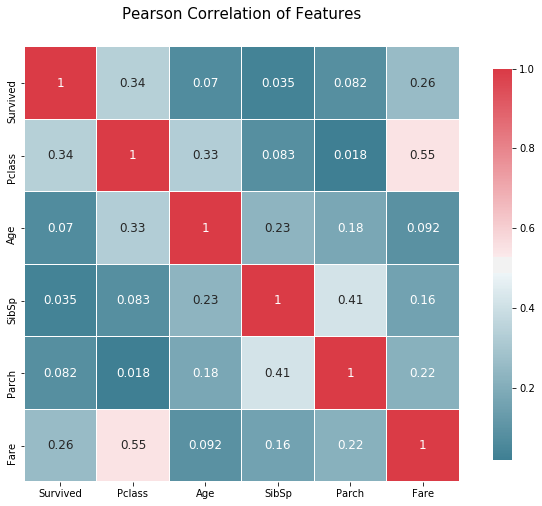

In [16]:
# mostramos el heatmap de correlaciones
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(12, 8))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr().abs(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train)

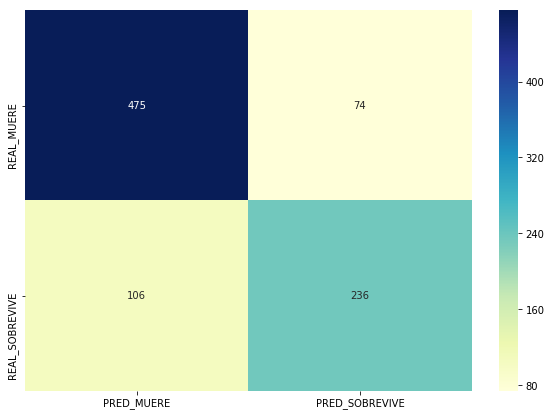

In [17]:
# mostramos la matriz de confusión
cm = confusion_matrix(y_train, y_pred)
plt.figure(figsize = (10,7))
df_cm = pd.DataFrame(cm, index = ['REAL_MUERE', 'REAL_SOBREVIVE'],
                  columns = ['PRED_MUERE', 'PRED_SOBREVIVE'])
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")

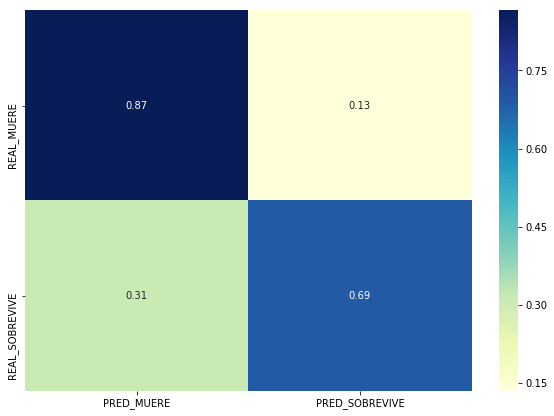

In [18]:
# mostramos la matriz de confusión normalizada
cm_norm = cm / cm.sum(axis=1)[:,None]
df_cm = pd.DataFrame(cm_norm, index = ['REAL_MUERE', 'REAL_SOBREVIVE'],
                  columns = ['PRED_MUERE', 'PRED_SOBREVIVE'])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt=".2f", cmap="YlGnBu")

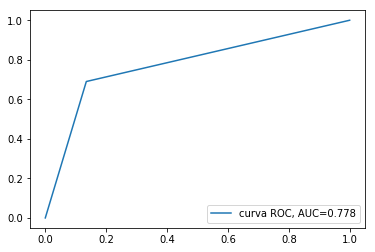

In [19]:
# mostramos la curva ROC
fpr, tpr, _ = roc_curve(y_train,  y_pred)
auc = roc_auc_score(y_train, y_pred)
plt.plot(fpr, tpr, label = "curva ROC, AUC=%.3f" % auc)
plt.legend(loc=4)
plt.show()

In [20]:
# exportamos el dataset
train_encoded.to_csv('train_encoded.csv', index = False)

In [21]:
# descartamos las columnas que no son relevantes para nuestro modelo
test.drop(columns=['Ticket', 'Name', 'Cabin'], inplace = True)

# completamos la edad con la media
test['Age'].fillna(test['Age'].mean(), inplace = True)

# completamos embarcado con la moda
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace = True)

# completamos la tarifa con la media
test['Fare'].fillna(test['Fare'].mean(), inplace = True)

# codificamos las variables categóricas
test_encoded = test.replace(codificaciones)

# obtenemos el conjunto de test final
X_test = test_encoded[['Age', 'SibSp', 'Parch', 'Fare', 'Pclass', 'Sex', 'Embarked']]

# obtenemos las predicciones del conjunto de datos
y_pred = np.round(modelo.predict(X_test)).astype(int)

# creamos el dataset submission
test['Survived'] = y_pred
submission = test.drop(columns=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])

# exportamos el dataset
submission.to_csv('submission.csv', index = False)